In [1]:
import numpy as np

from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target



In [2]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X,y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [3]:
clf = LogisticRegression()

clf.fit(X_train, y_train)


/home/ma/.bin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [4]:
clf.score(X_test, y_test)


0.9473684210526315

In [5]:
y_pred = clf.predict(X_test)


In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [7]:


accuracy_score(y_test, y_pred)

cmat = confusion_matrix(y_test, y_pred)


In [8]:
accuracy_score(y_test, y_pred)

0.9473684210526315

In [9]:
cmat

array([[45,  2],
       [ 4, 63]])

In [10]:
clf.decision_function(X_test[12:15])


array([ 5.64355006, -1.79947753,  1.53881911])

In [16]:
clf.predict(X_test[12:15])


array([1, 0, 1])

In [17]:
(clf.decision_function(X_test[12:15])>0).astype(int)


array([1, 0, 1])

In [18]:
(clf.decision_function(X_test[12:15])>0.2).astype(int)


array([1, 0, 1])

In [19]:
(clf.decision_function(X_test[12:15])>-1).astype(int)


array([1, 0, 1])

In [22]:
for th in range(-3, 7):
    print(th, (clf.decision_function(X_test[12:15]) > th).astype(int))


-3 [1 1 1]
-2 [1 1 1]
-1 [1 0 1]
0 [1 0 1]
1 [1 0 1]
2 [1 0 0]
3 [1 0 0]
4 [1 0 0]
5 [1 0 0]
6 [0 0 0]


In [23]:
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt


AUC =  0.9936487773896475


Text(0.5, 0, 'False Positive Rate (1-specificity)')

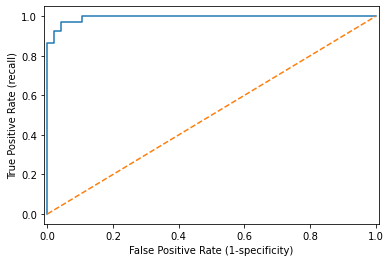

In [25]:
test_score = clf.decision_function(X_test)

fpr, tpr, th = roc_curve(y_test, test_score)

plt.plot(fpr, tpr)
print("AUC = ", auc(fpr, tpr))

plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylabel("True Positive Rate (recall)")
plt.xlabel("False Positive Rate (1-specificity)")


Text(0, 0.5, 'Precision')

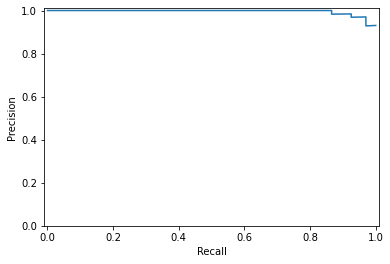

In [26]:
test_score = clf.decision_function(X_test)
precision, recall, th = precision_recall_curve(y_test, test_score)

plt.plot(recall, precision)

plt.xlim([-0.01, 1.01])
plt.ylim(0.0, 1.01)
plt.xlabel("Recall")
plt.ylabel("Precision")


result AUC 0.9936487773896475
chance AUC 0.569387107018101


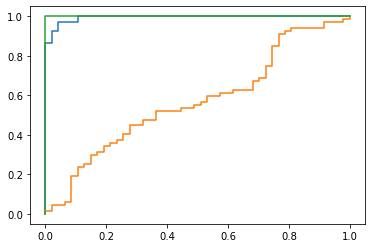

In [28]:
test_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, test_score)
plt.plot(fpr, tpr, label='result')
print("result AUC", auc(fpr, tpr))

test_score = np.random.uniform(size=y_test.size)
fpr, tpr, _ = roc_curve(y_test, test_score)
plt.plot(fpr, tpr, label='random / chance')
print("chance AUC", auc(fpr, tpr))


fpr, tpr, _ = roc_curve(y_test, y_test)
plt.plot(fpr, tpr, label="perfect")


(0.0, 1.01)

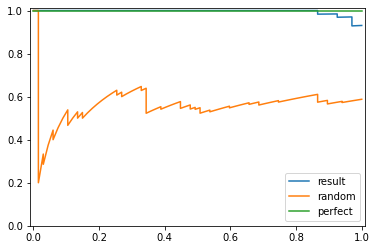

In [29]:
test_score = clf.decision_function(X_test)
precision, recall, th = precision_recall_curve(y_test, test_score)
plt.plot(recall, precision, label="result")

test_score = np.random.uniform(size=y_test.size)
precision, recall, th = precision_recall_curve(y_test, test_score)
plt.plot(recall, precision, label='random')

precision, recall, th = precision_recall_curve(y_test, y_test)
plt.plot(recall, precision, label='perfect')

plt.legend(loc='best')
plt.xlim(-0.01, 1.01)
plt.ylim(0, 1.01)
